<a href="https://colab.research.google.com/github/Maruf346/AI-ML-with-python/blob/main/K_Means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Elbow method Without Preprocessing**

K-Means Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
K-Means Centroids:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


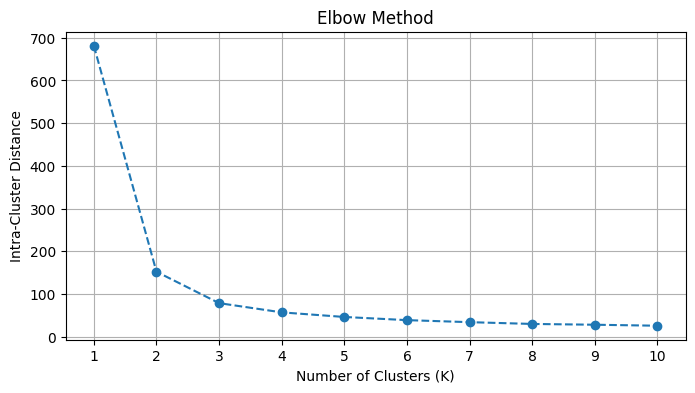

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Implement K-Means
kmeans = KMeans(n_clusters=3, random_state=42) # Assuming 3 clusters for Iris
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("K-Means Labels:", labels)
print("K-Means Centroids:\n", centroids)

# Elbow Method...
Intra_Cluster_Distance = []
for i in range(1, 11): # K values --> 1 to 10
    kmeans_elbow = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_elbow.fit(X)
    Intra_Cluster_Distance.append(kmeans_elbow.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), Intra_Cluster_Distance, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Intra-Cluster Distance')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


# **Elbow method With Preprocessing**

K-Means Labels: [1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
K-Means Centroids:
 [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


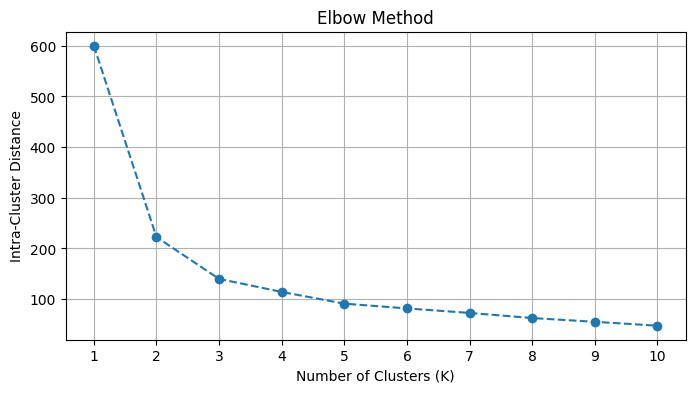

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Preprocessing...
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters
kmeans.fit(X_scaled)  # Apply K-Means on the scaled data
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("K-Means Labels:", labels)
print("K-Means Centroids:\n", centroids)

# Elbow Method...
Intra_Cluster_Distance = []
for i in range(1, 11):  # K values --> 1 to 10
    kmeans_elbow = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_elbow.fit(X_scaled)  # Apply K-Means on the scaled data
    Intra_Cluster_Distance.append(kmeans_elbow.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), Intra_Cluster_Distance, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Intra-Cluster Distance')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


# **Split the dataset into training and testing set and evaluate their performance using K-Means.**

In [22]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target  # Actual class labels (used for evaluation)

# Split the dataset (30% test, 70% train)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Preprocessing (Standardize features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply K-Means clustering on training data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

# Predict clusters
train_labels = kmeans.predict(X_train_scaled)
test_labels = kmeans.predict(X_test_scaled)

# Evaluate clustering performance
train_score = adjusted_rand_score(y_train, train_labels)
test_score = adjusted_rand_score(y_test, test_labels)

print("K-Means Clustering Performance using Adjusted Rand Index(ARI)):")
print(f"Train Score: {train_score:.4f}")
print(f"Test Score : {test_score:.4f}")


K-Means Clustering Performance using Adjusted Rand Index(ARI)):
Train Score: 0.6754
Test Score : 0.5171


# **Evaluate the model performance using Sepal Length vs Petal Width using K-Means.**

In [26]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, [0, 3]]  # Only use Sepal Length (0) and Petal Width (3)
y = iris.target           # Actual class labels (for evaluation)

# Split the dataset (30% test, 70% train)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Preprocessing (Standardize the two features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply K-Means clustering on training data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

# Predict cluster labels
train_labels = kmeans.predict(X_train_scaled)
test_labels = kmeans.predict(X_test_scaled)

# Evaluate clustering performance using Adjusted Rand Index (ARI)
train_score = adjusted_rand_score(y_train, train_labels)
test_score = adjusted_rand_score(y_test, test_labels)

# Output
print("K-Means Clustering Performance using Sepal Length & Petal Width (ARI):")
print(f"Train Score: {train_score:.4f}")
print(f"Test Score : {test_score:.4f}")


K-Means Clustering Performance using Sepal Length & Petal Width (ARI):
Train Score: 0.6001
Test Score : 0.5667
